# MODEL 

Cargamos las librerias necesarias

In [1]:
from _utils import *
import pandas as pd

## Cargamos la data

In [2]:
df = pd.read_json("../../datasets/json/supervised.json", orient="records")
df

,name,sharper,volatility,log_return,mean_close,std_close,max_close,min_close,mean_volume,std_volume,mean_rsi,std_rsi,mean_macd,std_macd,willGrow
0,0x0.ai: AI Smart Contract,0.097516,0.312315,0.002442,0.119016,0.119498,0.487685,0.000071,7.182052e+05,7.712041e+05,46.548461,16.475717,-0.000035,0.005903,1
1,0xBlack,0.542832,0.070213,0.005245,0.000293,0.000160,0.000810,0.000100,3.634713e+03,7.017758e+03,60.632957,22.618482,0.000001,0.000017,0
2,0xFair,1.048593,0.117327,0.012448,0.001180,0.001164,0.008289,0.000506,3.730876e+04,1.379735e+05,69.821031,18.615321,0.000033,0.000091,1
3,1ex,0.143458,0.154256,0.000803,0.067927,0.007216,0.083596,0.058836,3.674157e+05,1.306109e+05,50.519642,6.719585,0.000203,0.001042,0
4,1inch,-0.248474,0.097706,-0.001570,1.487967,1.508197,7.489723,0.224150,5.617800e+07,8.247229e+07,50.217769,17.997306,-0.000050,0.071438,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,xWIN Finance,-0.406589,0.038181,-0.003796,0.303774,0.209315,0.803825,0.028191,6.741957e+03,1.583665e+04,64.210678,22.867481,-0.000020,0.011530,0
2057,yearn.finance,-0.050608,0.108881,-0.000502,17479.022407,13365.265571,82924.082581,369.146991,8.856424e+07,1.465900e+08,50.788944,17.779021,-1.180531,723.439069,1
2058,zkSwap Finance,0.019873,0.137628,0.000080,0.052787,0.004783,0.062160,0.042871,3.687251e+05,1.413941e+05,51.516214,11.131654,0.000068,0.000709,0
2059,zkSync id,0.263673,0.129543,0.001358,0.043970,0.007107,0.058305,0.033252,5.567966e+04,4.513342e+04,56.447997,8.085059,0.000154,0.000404,0


In [49]:
df = df.dropna()

# Modelado

RandomForestClassifier

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Seleccionar las características y la etiqueta
features = ['sharper', 'volatility', 'log_return', 'mean_close', 'std_close', 'max_close', 'min_close', 'mean_volume', 'std_volume', 'mean_rsi', 'std_rsi', 'mean_macd', 'std_macd']
X = df[features]
y = df['willGrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
#Guardar modelo
import joblib
joblib.dump(model, "../../models/random_forest.joblib")

#Guardar scaler
joblib.dump(scaler, "../../models/scaler_forest.joblib")

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       194
           1       0.88      0.88      0.88       207

    accuracy                           0.88       401
   macro avg       0.88      0.88      0.88       401
weighted avg       0.88      0.88      0.88       401



['../../models/scaler_forest.joblib']

DNN

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.optimizers import Adam

# Seleccionar las características y la etiqueta
features = ['sharper', 'volatility', 'log_return', 'mean_close', 'std_close', 'max_close', 'min_close', 'mean_volume', 'std_volume', 'mean_rsi', 'std_rsi', 'mean_macd', 'std_macd']
X = df[features]
y = df['willGrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# Escalar las características
scaler = MinMaxScaler((-1,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la DNN
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(32, activation='elu'),
    Dense(16, activation='elu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=1e-2), loss='binary_focal_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)               │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5411 - loss: 0.1741 - val_accuracy: 0.6875 - val_loss: 0.1576
Epoch 2/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6509 - loss: 0.1542 - val_accuracy: 0.6531 - val_loss: 0.1554
Epoch 3/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - loss: 0.1547 - val_accuracy: 0.6687 - val_loss: 0.1554
Epoch 4/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6323 - loss: 0.1579 - val_accuracy: 0.6625 - val_loss: 0.1544
Epoch 5/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6493 - loss: 0.1563 - val_accuracy: 0.6875 - val_loss: 0.1498
Epoch 6/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6565 - loss: 0.1561 - val_accuracy: 0.6969 - val_loss: 0.1501
Epoch 7/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6589 - loss: 0.1545 - val_accuracy: 0.6625 - val_loss: 0.1555
Epoch 8/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6651 - loss: 0.1535 - val_accuracy: 0.6562 - v

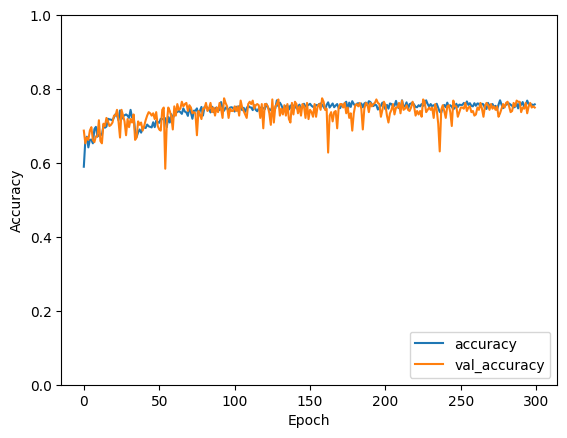

In [140]:
import matplotlib.pyplot as plt
# plot history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


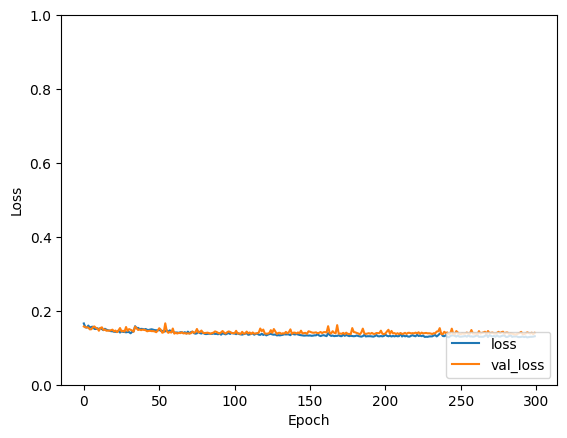

In [141]:
# plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [142]:
# Evaluar el modelo
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       194
           1       0.76      0.78      0.77       207

    accuracy                           0.76       401
   macro avg       0.76      0.76      0.76       401
weighted avg       0.76      0.76      0.76       401



In [151]:
t = joblib.load("../../models/random_forest.joblib")